In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")

import math

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns',100)

/kaggle/input/data-processing-in-house-price/X_test.csv
/kaggle/input/data-processing-in-house-price/y_train.csv
/kaggle/input/data-processing-in-house-price/X_train.csv
/kaggle/input/data-processing-in-house-price/__results__.html
/kaggle/input/data-processing-in-house-price/__notebook__.ipynb
/kaggle/input/data-processing-in-house-price/__output__.json
/kaggle/input/data-processing-in-house-price/custom.css
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
X_train = pd.read_csv('/kaggle/input/data-processing-in-house-price/X_train.csv')
X_test = pd.read_csv('/kaggle/input/data-processing-in-house-price/X_test.csv')
y_train = np.ravel(pd.read_csv('/kaggle/input/data-processing-in-house-price/y_train.csv'))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Ridge

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

scaling = StandardScaler().fit(X_train)
modelRidge=Ridge().fit(scaling.transform(X_train),y_train)

In [6]:
modelRidge.score(scaling.transform(X_val),y_val)

0.8931107554448854

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred=modelRidge.predict(scaling.transform(X_val))
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

R2 Score: 0.8931107554448854
Mean Absolude Error: 19014.292576987125
Mean Square Error: 819875373.7775297
Root Mean Square Error: 28633.465975629457


In [8]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = modelRidge.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionRidge.csv')
print(sample_submission)

        Id     SalePrice
0     1461  9.503075e+07
1     1462  1.240479e+08
2     1463  1.341221e+08
3     1464  1.180416e+08
4     1465  8.325752e+07
...    ...           ...
1454  2915  7.182564e+07
1455  2916  6.392624e+07
1456  2917  1.447601e+08
1457  2918  9.991712e+07
1458  2919  1.355856e+08

[1459 rows x 2 columns]


# Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
#model = RandomForestRegressor(random_state=87)
#parameters = {'n_estimators':[100, 200, 300],
#             'max_depth':range(1,16)
    
#}
#clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='r2')
#clf.fit(X_train,np.ravel(y_train))

In [11]:
#clf.best_params_

In [12]:
modelRF = RandomForestRegressor(random_state=87, n_estimators=100, max_depth=10)
modelRF.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=87)

In [13]:
modelRF.score(X_val, y_val)

0.8862297599462092

In [14]:
y_pred=modelRF.predict(X_val)
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

R2 Score: 0.8862297599462092
Mean Absolude Error: 17575.644743264013
Mean Square Error: 872654853.8825616
Root Mean Square Error: 29540.732114870843


In [15]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = modelRF.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionRF.csv')
print(sample_submission)

        Id      SalePrice
0     1461  126332.693906
1     1462  154301.110732
2     1463  177760.989633
3     1464  180826.505062
4     1465  207218.461845
...    ...            ...
1454  2915   90458.590149
1455  2916   93474.524384
1456  2917  153518.093632
1457  2918  118061.076844
1458  2919  224357.070564

[1459 rows x 2 columns]


# XGBoots Regressor

In [16]:
import xgboost as xgb

In [17]:
#model = xgb.XGBRegressor(random_state=42, booster='gbtree')
#parameters = {'learning_rate': [0.1, 0.01, 0.001],
#             'max_depth': range(1,16),
#              'n_estimators': [100, 200, 300,]
#}
#clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='r2')
#clf.fit(X_train,y_train)

In [18]:
#clf.best_params_

In [19]:
xgb_model = xgb.XGBRegressor(random_state=42, 
                             booster='gbtree',
                             learning_rate=0.1,
                             max_depth=3, 
                             n_estimators=300)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [20]:
xgb_model.score(X_val,y_val)

0.8904052500462469

In [21]:
y_pred=xgb_model.predict(X_val)
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

R2 Score: 0.8904052500462469
Mean Absolude Error: 16225.85652557791
Mean Square Error: 840627482.7403926
Root Mean Square Error: 28993.576577241944


In [22]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = xgb_model.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionXGB.csv')
print(sample_submission)

        Id      SalePrice
0     1461  127792.054688
1     1462  155512.859375
2     1463  186364.453125
3     1464  194142.812500
4     1465  192923.843750
...    ...            ...
1454  2915   91065.929688
1455  2916   72840.570312
1456  2917  157698.656250
1457  2918  123100.023438
1458  2919  227269.593750

[1459 rows x 2 columns]


# LightGBM

In [23]:
import lightgbm as lgb

In [24]:
#model = lgb.LGBMRegressor(random_state=42)
#parameters = {'learning_rate': [0.1, 0.01, 0.001],
#              'max_depth': range(1,16),
#              'n_estimators': [100, 200, 300],
#              'num_leaves':[20,30,40,50]
#}
#clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='r2')
#clf.fit(X_train,y_train)

In [25]:
#clf.best_params_

In [26]:
lgb_model = lgb.LGBMRegressor(random_state=42,
                             learning_rate=0.1,
                             max_depth=4, 
                             n_estimators=300,
                             num_leaves=20
                            )
lgb_model.fit(X_train, y_train)

LGBMRegressor(max_depth=4, n_estimators=300, num_leaves=20, random_state=42)

In [27]:
lgb_model.score(X_val,y_val)

0.8802524795150797

In [28]:
y_pred=lgb_model.predict(X_val)
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

R2 Score: 0.8802524795150797
Mean Absolude Error: 17079.72861197388
Mean Square Error: 918502544.6211617
Root Mean Square Error: 30306.80690242972


In [29]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = lgb_model.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionLGB.csv')
print(sample_submission)

        Id      SalePrice
0     1461  127395.680317
1     1462  154119.760807
2     1463  192999.613516
3     1464  198868.845534
4     1465  196097.114028
...    ...            ...
1454  2915   85754.338359
1455  2916   81153.325644
1456  2917  166793.146797
1457  2918  123477.364742
1458  2919  194889.834651

[1459 rows x 2 columns]


# Neural Network

In [30]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.utils import set_random_seed
from tensorflow_addons.metrics import RSquare

set_random_seed(42)

nn_model =  Sequential()

nn_model.add(Dense(128, input_shape=(X_train.shape[1],), 
                   activation='relu'))

nn_model.add(Dense(128, activation='relu'))

nn_model.add(Dense(128, activation='relu'))

nn_model.add(Dense(1))

early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=25)

nn_model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=[RSquare()])
nn_model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=16, 
          callbacks=[early_stop],
          validation_data=(X_val, y_val))

Epoch 1/150
73/73 [==============================] - 2s 7ms/step - loss: 20743354368.0000 - r_square: -2.4778 - val_loss: 5851371008.0000 - val_r_square: 0.2371
Epoch 2/150
73/73 [==============================] - 0s 3ms/step - loss: 3902946560.0000 - r_square: 0.3456 - val_loss: 3443757568.0000 - val_r_square: 0.5510
Epoch 3/150
73/73 [==============================] - 0s 3ms/step - loss: 2938840832.0000 - r_square: 0.5073 - val_loss: 2992898816.0000 - val_r_square: 0.6098
Epoch 4/150
73/73 [==============================] - 0s 4ms/step - loss: 2554832384.0000 - r_square: 0.5717 - val_loss: 2540596736.0000 - val_r_square: 0.6688
Epoch 5/150
73/73 [==============================] - 0s 4ms/step - loss: 2333815808.0000 - r_square: 0.6087 - val_loss: 2218196736.0000 - val_r_square: 0.7108
Epoch 6/150
73/73 [==============================] - 0s 4ms/step - loss: 2139697920.0000 - r_square: 0.6413 - val_loss: 1994765440.0000 - val_r_square: 0.7399
Epoch 7/150
73/73 [=========================

<Axes: >

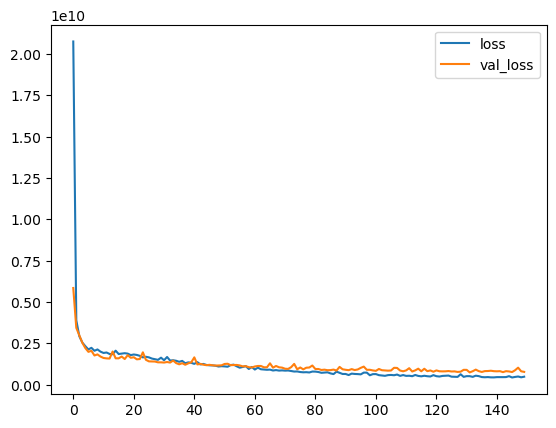

In [31]:
pd.DataFrame(nn_model.history.history)[['loss','val_loss']].plot()

In [32]:
nn_model.evaluate(X_val, y_val)

10/10 [==============================] - 0s 2ms/step - loss: 784555328.0000 - r_square: 0.8977


[784555328.0, 0.8977154493331909]

In [33]:
y_pred=nn_model.predict(X_val)
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

10/10 [==============================] - 0s 2ms/step
R2 Score: 0.89771549193816
Mean Absolude Error: 17740.381180436645
Mean Square Error: 784555542.7759744
Root Mean Square Error: 28009.918649934963


In [34]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = nn_model.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionNN.csv')
print(sample_submission)

46/46 [==============================] - 0s 1ms/step
        Id      SalePrice
0     1461  118316.867188
1     1462  115677.476562
2     1463  194055.921875
3     1464  193506.078125
4     1465  171570.734375
...    ...            ...
1454  2915   88304.453125
1455  2916   98760.632812
1456  2917  178496.718750
1457  2918   84945.625000
1458  2919  222671.218750

[1459 rows x 2 columns]
